In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret[full]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 26.5 MB/s eta 

In [ ]:
# Version check
import pycaret
pycaret.__version__

'3.1.0'

Please find the link to the diabetes dataset:
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#reading the data
df=pd.read_csv('/content/drive/MyDrive/DM-Assignment-2-part2/diabetes.csv')

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#using the object base api of pycaret
# import ClassificationExperiment and init the class

from pycaret.classification import ClassificationExperiment
e1 = ClassificationExperiment()


In [ ]:
# init setup on exp, our target column is diagnosis
a1=e1.setup(df, target = 'Outcome', session_id = 150)

,Description,Value
0,Session id,150
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#comparing the baseline models and finding the best model
best_model = e1.compare_models()
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7784,0.0000,0.5728,0.7423,0.6428,0.4864,0.4977,0.0300
lr,Logistic Regression,0.7766,0.8333,0.5784,0.7360,0.6432,0.4843,0.4951,0.5700
lda,Linear Discriminant Analysis,0.7766,0.8353,0.5784,0.7341,0.6426,0.4839,0.4944,0.0630
et,Extra Trees Classifier,0.7636,0.8301,0.5678,0.7098,0.6214,0.4544,0.4667,0.2400
nb,Naive Bayes,0.7615,0.8219,0.6365,0.6683,0.6480,0.4688,0.4721,0.0340
gbc,Gradient Boosting Classifier,0.7599,0.8374,0.6319,0.6711,0.6452,0.4648,0.4701,0.3180
catboost,CatBoost Classifier,0.7543,0.8369,0.5997,0.6692,0.6273,0.4460,0.4514,3.4100
rf,Random Forest Classifier,0.7488,0.8281,0.5626,0.6703,0.6045,0.4241,0.4325,0.4680
ada,Ada Boost Classifier,0.7450,0.8086,0.5892,0.6469,0.6120,0.4242,0.4283,0.2830
xgboost,Extreme Gradient Boosting,0.7431,0.7883,0.5994,0.6494,0.6175,0.4258,0.4310,0.0990


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=150, solver='auto',
                tol=0.0001)


In [ ]:
#evaluate_model function to analyzes the performance of a trained model on the test data
e1.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

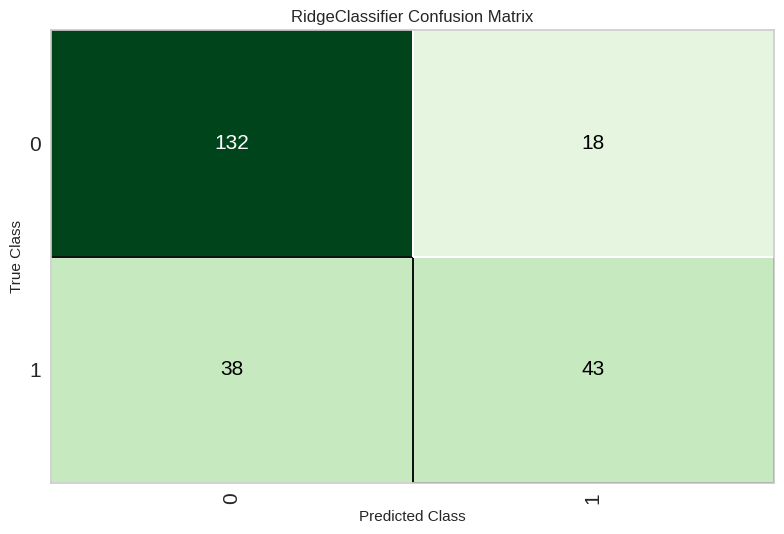

In [ ]:
e1.plot_model(best_model, plot='confusion_matrix')

In [ ]:
rd=e1.create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.0000,0.5263,0.9091,0.6667,0.5507,0.5902
1,0.7778,0.0000,0.5263,0.7692,0.6250,0.4749,0.4921
2,0.7407,0.0000,0.5263,0.6667,0.5882,0.4028,0.4088
3,0.8148,0.0000,0.6316,0.8000,0.7059,0.5735,0.5820
4,0.7778,0.0000,0.5263,0.7692,0.6250,0.4749,0.4921
5,0.7778,0.0000,0.5263,0.7692,0.6250,0.4749,0.4921
6,0.7407,0.0000,0.6316,0.6316,0.6316,0.4316,0.4316
7,0.7358,0.0000,0.5556,0.6250,0.5882,0.3948,0.3963
8,0.8113,0.0000,0.6667,0.7500,0.7059,0.5677,0.5698


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_ridge_model=e1.tune_model(rd)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.0000,0.5263,0.9091,0.6667,0.5507,0.5902
1,0.7778,0.0000,0.5263,0.7692,0.6250,0.4749,0.4921
2,0.7222,0.0000,0.4737,0.6429,0.5455,0.3520,0.3605
3,0.8148,0.0000,0.6316,0.8000,0.7059,0.5735,0.5820
4,0.7778,0.0000,0.5263,0.7692,0.6250,0.4749,0.4921
5,0.7778,0.0000,0.5263,0.7692,0.6250,0.4749,0.4921
6,0.7593,0.0000,0.6316,0.6667,0.6486,0.4658,0.4661
7,0.7358,0.0000,0.5556,0.6250,0.5882,0.3948,0.3963
8,0.8113,0.0000,0.6667,0.7500,0.7059,0.5677,0.5698


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
lr = e1.create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.8617,0.5263,0.9091,0.6667,0.5507,0.5902
1,0.7778,0.8211,0.5263,0.7692,0.6250,0.4749,0.4921
2,0.7222,0.7850,0.5263,0.6250,0.5714,0.3682,0.3711
3,0.8148,0.8797,0.6316,0.8000,0.7059,0.5735,0.5820
4,0.7778,0.8030,0.5263,0.7692,0.6250,0.4749,0.4921
5,0.7778,0.7850,0.5263,0.7692,0.6250,0.4749,0.4921
6,0.7407,0.8165,0.6316,0.6316,0.6316,0.4316,0.4316
7,0.7547,0.7762,0.6111,0.6471,0.6286,0.4457,0.4461
8,0.7925,0.9254,0.6667,0.7059,0.6857,0.5310,0.5315


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
dt = e1.create_model('dt', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.6226,0.4737,0.5294,0.5000,0.2512,0.2520
1,0.7222,0.6654,0.4737,0.6429,0.5455,0.3520,0.3605
2,0.6852,0.6609,0.5789,0.5500,0.5641,0.3180,0.3182
3,0.6111,0.5797,0.4737,0.4500,0.4615,0.1575,0.1576
4,0.7037,0.6511,0.4737,0.6000,0.5294,0.3175,0.3223
5,0.7222,0.7135,0.6842,0.5909,0.6341,0.4122,0.4151
6,0.7407,0.7158,0.6316,0.6316,0.6316,0.4316,0.4316
7,0.6792,0.6492,0.5556,0.5263,0.5405,0.2944,0.2947
8,0.7925,0.7619,0.6667,0.7059,0.6857,0.5310,0.5315


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf = e1.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8459,0.4211,0.8000,0.5517,0.4081,0.4474
1,0.7222,0.8060,0.4737,0.6429,0.5455,0.3520,0.3605
2,0.7222,0.7992,0.5263,0.6250,0.5714,0.3682,0.3711
3,0.7593,0.8511,0.5789,0.6875,0.6286,0.4524,0.4561
4,0.7407,0.8248,0.5789,0.6471,0.6111,0.4176,0.4190
5,0.7222,0.7504,0.6316,0.6000,0.6154,0.3982,0.3985
6,0.7037,0.8150,0.5263,0.5882,0.5556,0.3344,0.3355
7,0.7170,0.8016,0.5000,0.6000,0.5455,0.3424,0.3454
8,0.8679,0.9222,0.8889,0.7619,0.8205,0.7170,0.7223


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
e1.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
rd=e1.create_model(rd)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.0000,0.5263,0.9091,0.6667,0.5507,0.5902
1,0.7778,0.0000,0.5263,0.7692,0.6250,0.4749,0.4921
2,0.7407,0.0000,0.5263,0.6667,0.5882,0.4028,0.4088
3,0.8148,0.0000,0.6316,0.8000,0.7059,0.5735,0.5820
4,0.7778,0.0000,0.5263,0.7692,0.6250,0.4749,0.4921
5,0.7778,0.0000,0.5263,0.7692,0.6250,0.4749,0.4921
6,0.7407,0.0000,0.6316,0.6316,0.6316,0.4316,0.4316
7,0.7358,0.0000,0.5556,0.6250,0.5882,0.3948,0.3963
8,0.8113,0.0000,0.6667,0.7500,0.7059,0.5677,0.5698


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

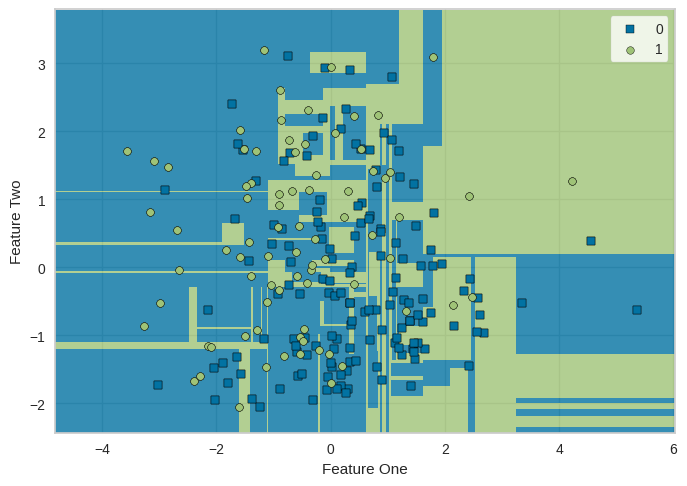

In [ ]:
e1.plot_model(dt, plot = 'boundary')

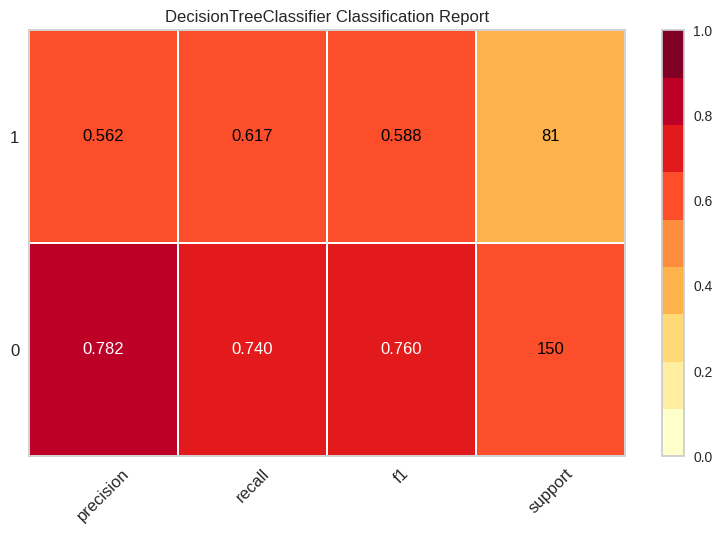

In [ ]:
e1.plot_model(dt, plot = 'class_report')

In [ ]:
p=predict_model(md,df)#predicting on our data
print(p)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0              6      148             72             35        0  33.599998   
1              1       85             66             29        0  26.600000   
2              8      183             64              0        0  23.299999   
3              1       89             66             23       94  28.100000   
4              0      137             40             35      168  43.099998   
..           ...      ...            ...            ...      ...        ...   
763           10      101             76             48      180  32.900002   
764            2      122             70             27        0  36.799999   
765            5      121             72             23      112  26.200001   
766            1      126             60              0        0  30.100000   
767            1       93             70             31        0  30.400000   

     DiabetesPedigreeFunction  Age  Outcome  predic

In [ ]:

! mkdir -p /content/drive/MyDrive/DM-Assignment-2-part2/tuned_ridge_diabetes_PyCaretBinaryClassifiation

In [ ]:
#exporting the model as file
e1.save_model(tuned_ridge_model,'/content/drive/MyDrive/DM-Assignment-2-part2/tuned_ridge_diabetes_PyCaretBinaryClassifiation/')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                   

In [ ]:
#read the saved pipeline and predicting on that data
from pycaret.classification import load_model
md=load_model('/content/drive/MyDrive/DM-Assignment-2-part2/tuned_ridge_diabetes_PyCaretBinaryClassifiation/')


Transformation Pipeline and Model Successfully Loaded


In [ ]:
from sklearn import get_config


In [ ]:
X_train = get_config()
X_train

{'assume_finite': False,
 'working_memory': 1024,
 'print_changed_only': False,
 'display': 'diagram',
 'pairwise_dist_chunk_size': 256,
 'enable_cython_pairwise_dist': True,
 'array_api_dispatch': False,
 'transform_output': 'default'}